In [103]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
import matplotlib.pyplot as plt


import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics

class Processor(object):
    """ The processor for training job
    """

    def __init__(self, train_data_path, test_data_path):
        """ init processor
        """
        self.train_data_path = train_data_path
        self.test_data_path = test_data_path
        self.cat_cols = ["Month","DayofMonth","DayOfWeek",
        "UniqueCarrier", "Origin", "Dest"]
        self.num_cols = ["DepTime","Distance"]
        self.lable_col = "dep_delayed_15min"


    def load_data(self):
        """ loading data
        """
        train_df = pd.read_csv(self.train_data_path)
        test_df = pd.read_csv(self.test_data_path)
        return (train_df, test_df)

    def one_hot_encode(self, column, identifer):
        """ one hot encoding the column

        column: the pandas column
        identifer: the column name
        """
        # Ge one hot encoding of the column
        encoded_data = pd.get_dummies(column)
        encoded_cols = encoded_data.columns
        encoded_data.columns = ["{0}_{1}".format(identifer, col) for col in encoded_cols]
        return encoded_data

    def preprocess(self, train_df, test_df):
        """ Preprocess data:
            one-hot-encoding train data
        """
        num_train_rows = train_df.shape[0]
        union_train_test = train_df.append(test_df)
        %time encoded_train_test_cat = pd.concat(\
            [self.one_hot_encode(union_train_test[col], col) for col in self.cat_cols], axis=1)
        # concat numeric columns with one hot encoded columns
        encoded_train_test = pd.concat(
            [encoded_train_test_cat, union_train_test.loc[:, self.num_cols]], axis=1)
        encoded_target = np.where(union_train_test[self.lable_col] == "Y", 1, 0)
        self.X_train = encoded_train_test[0:num_train_rows]
        self.y_train = encoded_target[0:num_train_rows]
        self.X_test = encoded_train_test[num_train_rows:]
        self.y_test = encoded_target[num_train_rows:]

    def train(self):
        """ train data with algorithm
        """
        (train_df, test_df) = self.load_data()
        self.preprocess(train_df, test_df)
        classifier = LogisticRegression(tol=1e-4, C=1000)
        %time classifier.fit(self.X_train, self.y_train)
        predictions = classifier.predict_proba(self.X_test)
        auc = metrics.roc_auc_score(y_test, predictions[:, 1])
        print("auc", auc)

        # plot and save roc png
        import matplotlib
        matplotlib.use("Agg")
        import matplotlib.pyplot as plt
        fpr, tpr, thresholds = metrics.roc_curve(y_test, y_score)
        fig = plt.figure(1)
        plt.plot([0, 1], [0, 1], 'k--')
        plt.plot(fpr, tpr, label='LR')
        fig.savefig("./roc.png")




CPU times: user 702 ms, sys: 79.9 ms, total: 781 ms
Wall time: 815 ms
CPU times: user 88.9 ms, sys: 69.1 ms, total: 158 ms
Wall time: 177 ms
('auc', 0.68670030915007119)


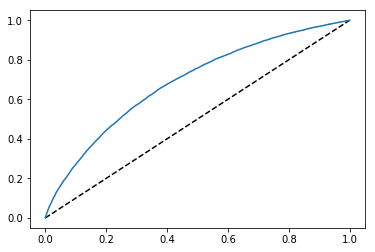

In [115]:
train_path = "/Users/lgrcyanny/Codecookies/machine-learning-workspace/datasets/flight/train-0.01m.csv"
test_path = "/Users/lgrcyanny/Codecookies/machine-learning-workspace/datasets/flight/test.csv"
p = Processor(train_path, test_path)
p.train()

In [108]:
train_df, test_df = p.load_data()

In [109]:
train_df.head()

,Month,DayofMonth,DayOfWeek,DepTime,UniqueCarrier,Origin,Dest,Distance,dep_delayed_15min
0,c-7,c-4,c-1,1835,AS,SFO,SEA,679,N
1,c-7,c-21,c-5,2341,DL,SEA,CVG,1964,N
2,c-10,c-9,c-7,1027,NW,GTF,FCA,146,N
3,c-10,c-20,c-5,1823,XE,DCA,CLE,310,N
4,c-11,c-15,c-3,2059,FL,ATL,LGA,761,Y


In [110]:
train_num = train_df.drop(["DepTime","Distance"], axis=1)
train_df.columns

Index([u'Month', u'DayofMonth', u'DayOfWeek', u'DepTime', u'UniqueCarrier',
       u'Origin', u'Dest', u'Distance', u'dep_delayed_15min'],
      dtype='object')

In [111]:
def one_hot_encode(column, identifer):
    """ one hot encoding the column

    column: the pandas column
    identifer: the column name
    """
    # Ge one hot encoding of the column
    encoded_data = pd.get_dummies(column)
    encoded_cols = encoded_data.columns
    encoded_data.columns = ["{0}_{1}".format(identifer, col) for col in encoded_cols]
    return (encoded_data)

In [79]:
cat_cols = ["Month","DayofMonth","DayOfWeek",
        "UniqueCarrier", "Origin", "Dest"]
num_cols = ["DepTime","Distance"]
label_col = "dep_delayed_15min"
num_train_rows = train_df.shape[0]
union_train_test = train_df.append(test_df)
%time encoded_train_test_cat = pd.concat([one_hot_encode(union_train_test[col], col) for col in cat_cols], axis=1)
# concat numeric columns with one hot encoded columns
encoded_train_test = pd.concat(
    [encoded_train_test_cat, union_train_test.loc[:, num_cols]], axis=1)
encoded_target = np.where(union_train_test[label_col] == "Y", 1, 0)
X_train = encoded_train_test[0:num_train_rows]
y_train = encoded_target[0:num_train_rows]
X_test = encoded_train_test[num_train_rows:]
y_test = encoded_target[num_train_rows:]

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
CPU times: user 734 ms, sys: 70.7 ms, total: 805 ms
Wall time: 821 ms


pandas.core.frame.DataFrame

In [81]:
classifier = LogisticRegression(tol=1e-4, C=1000)
%time classifier.fit(X_train, y_train)

CPU times: user 179 ms, sys: 160 ms, total: 339 ms
Wall time: 523 ms


LogisticRegression(C=1000, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [89]:
predictions = classifier.predict_proba(X_test)
y_score = predictions[:, 1]
metrics.roc_auc_score(y_test, y_score)

0.68670030915007119

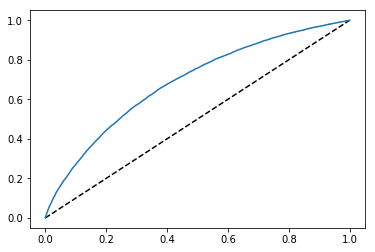

In [97]:
%matplotlib inline
import matplotlib
matplotlib.use("Agg")
import matplotlib.pyplot as plt
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_score)
fig = plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='RT + LR')
fig.savefig("/Users/lgrcyanny/Downloads/roc.png")

In [106]:
from sklearn.externals import joblib
joblib.dump(classifier, '/Users/lgrcyanny/Downloads//model.pickle')

['/Users/lgrcyanny/Downloads//model.pickle']